In [1]:
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
names = 'horse_data.names'
f = open (names, 'r', encoding = 'utf-8')
content = f.readlines()

In [3]:
# извлечем заголовки столбцов
col_names_dict = {}
for string in content:
    data = re.findall(r'\d{1,2}:\n*', string)
    meaning = re.findall(r'\D*', string)
    if len(data) >= 1:
        key = data[0].strip(':')
        value = meaning[-2].strip(':').strip()
        col_names_dict[key]  = value
col_names = list(col_names_dict.values())

In [4]:
len(col_names)

26

In [5]:
df = pd.read_csv('horse_data.csv', na_values = '?')
df.head()


,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,45.00,8.40,?.4,?.5,2.2,2.3,11300,00000,00000.1,2.4
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,1.0,2,0,0,0,2


In [6]:
df['sum'] = df['11300'] + df['00000'] + df['00000.1']
df = df.drop(['11300', '00000', '00000.1'], axis = 1)
df.head()

,2,1,530101,38.50,66,28,3,3.1,?,2.1,...,3.2,5.1,45.00,8.40,?.4,?.5,2.2,2.3,2.4,sum
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2,2208
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,1,0
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,1,2208
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,2,4300
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,2,0


In [7]:
col_names

['surgery?',
 'Age',
 'Hospital Number',
 'rectal temperature',
 'pulse',
 'respiratory rate',
 'temperature of extremities',
 'peripheral pulse',
 'mucous membranes',
 'capillary refill time',
 "pain - a subjective judgement of the horse's pain level",
 'peristalsis',
 'abdominal distension',
 'nasogastric tube',
 'nasogastric reflux',
 'nasogastric reflux PH',
 'rectal examination - feces',
 'abdomen',
 'packed cell volume',
 'total protein',
 'abdominocentesis appearance',
 'abdomcentesis total protein',
 'outcome',
 'surgical lesion?',
 'type of lesion',
 'cp_data']

In [8]:
col_names[-1], col_names[-2] = col_names[-2], col_names[-1]
col_names

['surgery?',
 'Age',
 'Hospital Number',
 'rectal temperature',
 'pulse',
 'respiratory rate',
 'temperature of extremities',
 'peripheral pulse',
 'mucous membranes',
 'capillary refill time',
 "pain - a subjective judgement of the horse's pain level",
 'peristalsis',
 'abdominal distension',
 'nasogastric tube',
 'nasogastric reflux',
 'nasogastric reflux PH',
 'rectal examination - feces',
 'abdomen',
 'packed cell volume',
 'total protein',
 'abdominocentesis appearance',
 'abdomcentesis total protein',
 'outcome',
 'surgical lesion?',
 'cp_data',
 'type of lesion']

In [9]:
df.columns = col_names
df.head()

,surgery?,Age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,cp_data,type of lesion
0,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2,2208
1,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,1,0
2,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,1,2208
3,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,2,4300
4,2.0,1,528355,NaN,NaN,NaN,2.0,1.0,3.0,1.0,...,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,2,0


## Задание 1.
Базовое изучение
Изучить представленный набор данных на основе описания его столбцов и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

## Попробуем сформировать критерии, которые позволят оценить перспективы лошади в полевых условиях

In [10]:
# устанавливаем регистрационный номер в качестве индекса
df = df.set_index('Hospital Number')
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,...,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,cp_data,type of lesion
Hospital Number,,,,,,,,,,,,,,,,,,,,,
534817,1.0,1,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,...,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2,2208
530334,2.0,1,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,...,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,1,0
5290409,1.0,9,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,...,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,1,2208
530255,2.0,1,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,...,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,2,4300
528355,2.0,1,NaN,NaN,NaN,2.0,1.0,3.0,1.0,2.0,...,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,2,0


In [11]:
df['Age'].value_counts()    

1    275
9     24
Name: Age, dtype: int64

In [12]:
#удаляем столбец с возрастом, поскольку он содержит левые данные (вместо 1 и 2, 1 и некоторое количество 9).
#Девятка далеко от обеих цифр на клавиатуре, поэтому можно только гадать, что она значит.
#Возраст был бы важен, но здесь мы просто не можем доверять данным.
df = df.drop(['Age'], axis = 1)
df.head()

,surgery?,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,...,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,cp_data,type of lesion
Hospital Number,,,,,,,,,,,,,,,,,,,,,
534817,1.0,39.2,88.0,20.0,NaN,NaN,4.0,1.0,3.0,4.0,...,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2,2208
530334,2.0,38.3,40.0,24.0,1.0,1.0,3.0,1.0,3.0,3.0,...,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,1,0
5290409,1.0,39.1,164.0,84.0,4.0,1.0,6.0,2.0,2.0,4.0,...,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,1,2208
530255,2.0,37.3,104.0,35.0,NaN,NaN,6.0,2.0,NaN,NaN,...,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,2,4300
528355,2.0,NaN,NaN,NaN,2.0,1.0,3.0,1.0,2.0,3.0,...,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,2,0


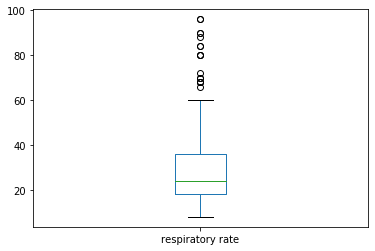

In [13]:
df['respiratory rate'].plot(kind = 'box')

In [14]:
# удаляем частоту дыхания - по условиям должна находиться в коридоре 8..10, а на деле огромные флуктуации,
# о чем и сказано в описании
df = df.drop(['respiratory rate'], axis = 1)
df.head()

,surgery?,rectal temperature,pulse,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,abdominal distension,...,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,cp_data,type of lesion
Hospital Number,,,,,,,,,,,,,,,,,,,,,
534817,1.0,39.2,88.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,...,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2,2208
530334,2.0,38.3,40.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,...,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,1,0
5290409,1.0,39.1,164.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,...,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,1,2208
530255,2.0,37.3,104.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,...,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,2,4300
528355,2.0,NaN,NaN,2.0,1.0,3.0,1.0,2.0,3.0,2.0,...,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,2,0


In [15]:
#удаляем cp_data, которые по описанию не имеют значения в нашем случае.
df = df.drop(['cp_data'], axis = 1)

In [16]:
df.head()

,surgery?,rectal temperature,pulse,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,abdominal distension,...,nasogastric reflux PH,rectal examination - feces,abdomen,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,,,,,,,,,,
534817,1.0,39.2,88.0,NaN,NaN,4.0,1.0,3.0,4.0,2.0,...,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208
530334,2.0,38.3,40.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,...,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0
5290409,1.0,39.1,164.0,4.0,1.0,6.0,2.0,2.0,4.0,4.0,...,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208
530255,2.0,37.3,104.0,NaN,NaN,6.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300
528355,2.0,NaN,NaN,2.0,1.0,3.0,1.0,2.0,3.0,2.0,...,NaN,3.0,3.0,NaN,NaN,NaN,NaN,1.0,2,0


In [17]:
# смотрим, что у нас с пропусками
for column in df.columns:
    print (f'{column}: {df[column].isna().sum()}')

surgery?: 1
rectal temperature: 60
pulse: 24
temperature of extremities: 56
peripheral pulse: 69
mucous membranes: 46
capillary refill time: 32
pain - a subjective judgement of the horse's pain level: 55
peristalsis: 44
abdominal distension: 56
nasogastric tube: 103
nasogastric reflux: 105
nasogastric reflux PH: 246
rectal examination - feces: 102
abdomen: 118
packed cell volume: 29
total protein: 33
abdominocentesis appearance: 164
abdomcentesis total protein: 197
outcome: 1
surgical lesion?: 0
type of lesion: 0


In [18]:
# удаляем столбцы с неприлично большим количеством пропусков (100+)
df = df.drop(['nasogastric tube', 'nasogastric reflux','nasogastric reflux PH','rectal examination - feces','abdomen', 'abdominocentesis appearance', 'abdomcentesis total protein'], axis = 1)

In [19]:
df.shape

(299, 15)

In [20]:
# Удаляем записи, в которых измерено мало параметров
df.dropna(thresh = 10, inplace = True)

In [21]:
df.shape

(267, 15)

In [22]:
# Проходим столбец за столбцом
# surgery? - имела ли место операция.
column = 'surgery?'
print(df[column].value_counts())
#очевидно, важный параметр, без пропусков и ошибок

1.0    158
2.0    108
Name: surgery?, dtype: int64


count    221.000000
mean      38.167873
std        0.737508
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal temperature, dtype: float64


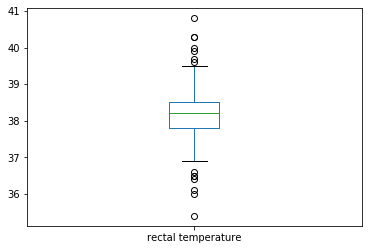

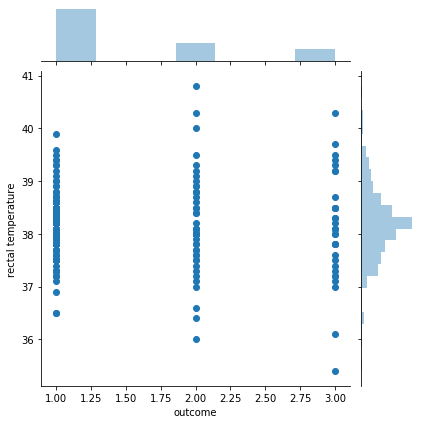

In [23]:
# Изучим температуру тела
column = 'rectal temperature'
display(df[column].plot(kind = 'box'))
print(df[column].describe())
sns.jointplot(x='outcome', y=column, data = df)
# Видим, что этот параметр никак не коррелирует с исходом лечения.
# Очевидно, что температура имеет смысл только в динамике, а здесь непонятно, в какой момент проводились измерения.
# В результате имеем что-то вроде средней температуры по больнице, поэтому смело удаляем

In [24]:
df.drop(['rectal temperature'], axis =1, inplace = True)

14

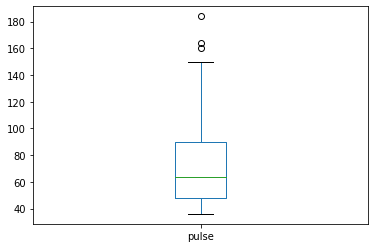

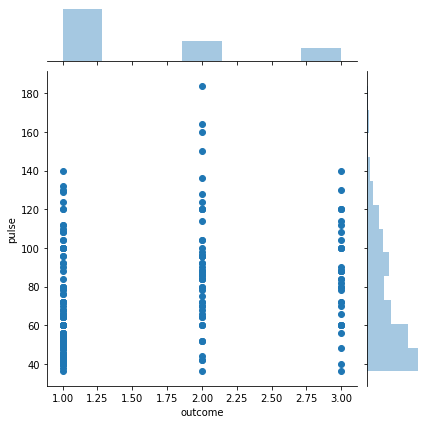

In [25]:
# далее пульс
column = 'pulse'
display(df[column].plot(kind = 'box'))
sns.jointplot(x='outcome', y=column, data = df)
# Присутствуют очень высокие значения, но выбросами их считать нельзя.
# На примере человека - пульс может составлять 40-50 ударов в покое и до 200 на пике активности
# Здесь прослеживается тенденция к тому, что чаще других высокий пульс встречается у погибших лошадей,
# что, вероятно, говорит о состоянии шока (о чем и сказано в описании)
len(df[df[column].isnull() == True][column])
# У нас 24 пустых значения, которые было бы неверно чем-то заполнять при таком огромном разбросе.
# Поскольку пульс, как и температура, меняется динамически, можем удалить столбец, поскольку практической пользы из него не извлечь

In [26]:
df.drop(column, axis = 1, inplace = True)

количество пропусков: 25


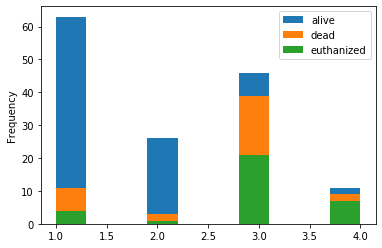

In [27]:
# Следующий параметр - температура конечностей, субъективная оценка
# 1 = Normal
# 2 = Warm
# 3 = Cool
# 4 = Cold
# - cool to cold extremities indicate possible shock
# - hot extremities should correlate with an elevated rectal temp.
column = 'temperature of extremities'
display(df[df['outcome'] == 1][column].plot(kind = 'hist', legend = True, label = 'alive'))
display(df[df['outcome'] == 2][column].plot(kind = 'hist', legend = True, label = 'dead'))
display(df[df['outcome'] == 3][column].plot(kind = 'hist', legend = True, label = 'euthanized'))
print('количество пропусков:', len(df[df[column].isnull() == True][column]))
# очень сильно коррелирует с исходом для лошади. Прохладные и холодные конечности практически гарантируют смерть.
# Важный параметр для быстрой оценки состояния

In [28]:
# У нас 25 пропусков - заполним их медианой в зависимости от исхода для лошади
for outcome in range(1,4):
    print(df[df['outcome'] == outcome][column].median())
df[column].isnull().value_counts()

2.0
3.0
3.0


False    242
True      25
Name: temperature of extremities, dtype: int64

In [29]:
df['temperature of extremities'].fillna(df.groupby('outcome')['temperature of extremities'].transform('median'), inplace = True)

In [30]:
df[column].isnull().value_counts()

False    267
Name: temperature of extremities, dtype: int64

In [31]:
df.sample(10)

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,,
528931,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,49.0,7.2,1.0,2,3111
528668,1.0,2.0,3.0,3.0,1.0,NaN,NaN,NaN,43.0,6.1,1.0,1,3209
535031,1.0,4.0,3.0,NaN,1.0,2.0,4.0,3.0,46.0,67.0,1.0,1,2208
529960,1.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,31.0,7.3,1.0,2,5124
527544,1.0,3.0,4.0,5.0,2.0,2.0,3.0,2.0,60.0,7.5,2.0,1,1400
530526,1.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,43.0,7.0,1.0,1,3111
529764,2.0,1.0,1.0,3.0,1.0,1.0,3.0,2.0,44.0,7.0,1.0,2,0
529607,1.0,3.0,NaN,NaN,1.0,NaN,4.0,2.0,44.0,8.3,2.0,1,2208
5291329,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,37.0,6.1,2.0,2,0


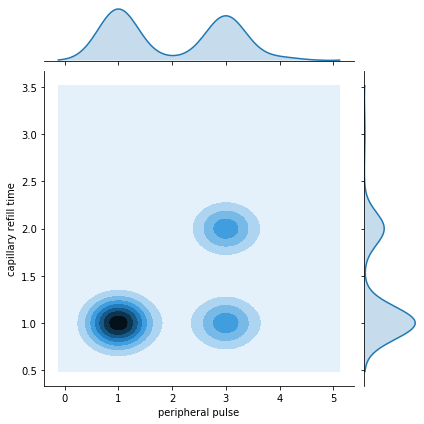

In [32]:
# изучаем периферический пульс
# 1 = normal
# 2 = increased
# 3 = reduced
# 4 = absent
# проверяем связь с заполняемостью капилляров
# - a clinical judgement. The longer the refill, the poorer the circulation
# - possible values
# 1 = < 3 seconds
# 2 = >= 3 seconds

sns.jointplot('peripheral pulse', 'capillary refill time', df, kind = 'kde')
# видим, что медленное заполнение капилляров наблюдается только при пониженном пульсе, что логично. По сути, параметр
# capillary refill time дублирует пульс, который можно оценить вручную.

In [33]:
df['peripheral pulse'].isnull().value_counts()

False    228
True      39
Name: peripheral pulse, dtype: int64

In [34]:
df['peripheral pulse'].fillna(df.groupby('capillary refill time')['peripheral pulse'].transform('median'), inplace = True)

In [35]:
df['peripheral pulse'].isnull().value_counts()

False    264
True       3
Name: peripheral pulse, dtype: int64

In [36]:
df[df['peripheral pulse'].isnull() == True]

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,,
532349,1.0,3.0,NaN,4.0,NaN,5.0,4.0,3.0,50.0,77.0,1.0,1,3205
535314,2.0,2.0,NaN,NaN,NaN,1.0,1.0,NaN,34.0,63.0,1.0,2,0
534644,1.0,2.0,NaN,1.0,NaN,1.0,1.0,NaN,36.0,67.0,1.0,2,0


In [37]:
# остается три пропуска. Поскольку, все они у выживших лошадей, заполним соответствующей медианой
df['peripheral pulse'].fillna(df.groupby('outcome')['peripheral pulse'].transform('median'), inplace = True)

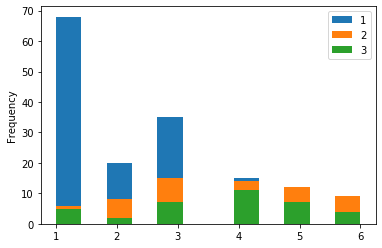

In [38]:
# Изучим цвет слизистых
#   1 = normal pink
#   2 = bright pink
#   3 = pale pink
#   4 = pale cyanotic
#   5 = bright red / injected
#   6 = dark cyanotic
# - 1 and 2 probably indicate a normal or slightly increased circulation
# - 3 may occur in early shock
# - 4 and 6 are indicative of serious circulatory compromise
# - 5 is more indicative of a septicemia
for outcome in range(1,4):
    df[df.outcome == outcome]['mucous membranes'].plot(kind = 'hist', bins = 12, legend = True, label = outcome)
# Показатель весьма надежный, но к тому моменту, как он проявляется, что-то предпринимать уже поздно.
# Для предупреждения серьезных последствий не годится. Тем не менее, при значениях 4-6, он поможет принять решение
# об эвтаназии


In [39]:
df['mucous membranes'].isnull().value_counts()

False    251
True      16
Name: mucous membranes, dtype: int64

In [40]:
# 46 пропусков заполним медианой для каждого исхода в отдельности
df['mucous membranes'].fillna(df.groupby('outcome')['mucous membranes'].transform('median'), inplace = True)

In [41]:
df['mucous membranes'].isnull().value_counts()

False    267
Name: mucous membranes, dtype: int64

In [42]:
df.sample(5)

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,,
529183,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,40.0,7.0,1.0,2,0
527916,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,43.0,5.9,1.0,2,0
535407,1.0,3.0,3.0,4.0,2.0,4.0,4.0,NaN,57.0,69.0,3.0,1,3205
530294,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,40.0,5.7,1.0,1,400
528812,2.0,4.0,3.0,3.0,2.0,4.0,4.0,3.0,73.0,8.4,3.0,1,7111


In [43]:
# for column in df.columns:
#     print(column)
#     print(df.groupby('outcome')[column].agg(['mean','median', 'count', 'min', 'max' ]))
#     print('- '*30)

In [44]:

df[column].isnull().value_counts()

False    267
Name: temperature of extremities, dtype: int64

In [45]:
column = 'capillary refill time'
print(column)
print(df.groupby('outcome')[column].agg(['mean','median', 'count', 'min', 'max' ]))
print('- '*30)
print(f'количество пропусков: {len(df[df[column].isnull() == True])}')

capillary refill time
             mean  median  count  min  max
outcome                                   
1.0      1.174194     1.0    155  1.0  3.0
2.0      1.484375     1.0     64  1.0  3.0
3.0      1.538462     2.0     39  1.0  2.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
количество пропусков: 8


In [46]:
df[df[column].isnull() == True]

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,,
532110,2.0,4.0,3.0,6.0,NaN,NaN,3.0,3.0,55.0,8.7,1.0,2,0
521681,1.0,2.0,1.0,4.0,NaN,2.0,3.0,1.0,48.0,7.2,1.0,1,3111
528298,1.0,4.0,3.0,3.0,NaN,5.0,4.0,3.0,53.0,5.9,2.0,1,3205
532349,1.0,3.0,1.0,4.0,NaN,5.0,4.0,3.0,50.0,77.0,1.0,1,3205
535314,2.0,2.0,1.0,2.0,NaN,1.0,1.0,NaN,34.0,63.0,1.0,2,0
527677,2.0,3.0,3.0,5.0,NaN,3.0,3.0,3.0,68.0,5.8,2.0,1,5400
533697,2.0,3.0,1.0,1.0,NaN,NaN,1.0,2.0,42.0,64.0,1.0,2,0
534644,1.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,36.0,67.0,1.0,2,0


In [47]:
# у нас обнаружилось три ошибочных значения в capillary refill time, заменим их нанами
df.loc[df[column] == 3, column] = np.nan

In [48]:
column = 'capillary refill time'
print(column)
print(df.groupby('outcome')[column].agg(['mean','median', 'count', 'min', 'max' ]))
print('- '*30)
print(f'количество пропусков: {len(df[df[column].isnull() == True])}')

capillary refill time
             mean  median  count  min  max
outcome                                   
1.0      1.162338     1.0    154  1.0  2.0
2.0      1.460317     1.0     63  1.0  2.0
3.0      1.538462     2.0     39  1.0  2.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
количество пропусков: 10


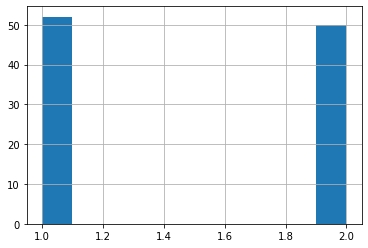

In [49]:
# немного настораживает, что при значительном отличии средней величины, мода и медиана для погибших лошадей такая же, как для живых
# проверим сумманые количества для погибших и умерщвленных и увидим, что даже в этом случае 1 преобладает
df[df['outcome'] >= 2][column].hist()

In [50]:
df.loc[(df['outcome'] <= 2) & (df[column].isnull() == True), [column]] = 1
df[df[column].isnull() == True]

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,,


In [51]:
df[column].isnull().value_counts()
# сам по себе параметр в рамках нашей концепции не супер важный, но весьма показательный и объективный,
# поэтому оставим на всякий случай.

False    267
Name: capillary refill time, dtype: int64

In [52]:
df.sample(3)

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain - a subjective judgement of the horse's pain level,peristalsis,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,,
534403,1.0,2.0,1.0,1.0,1.0,NaN,3.0,NaN,47.0,60.0,1.0,2,0
527927,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,50.0,7.8,1.0,1,2111
529183,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,40.0,7.0,1.0,2,0


In [53]:
# следующей изучим субъективную оценку болевых ощущений
# для начала переименуем заголовок в более лаконичное "pain"
column = 'pain'

# 1 = alert, no pain
# 2 = depressed
# 3 = intermittent mild pain
# 4 = intermittent severe pain
# 5 = continuous severe pain
# - should NOT be treated as a ordered or discrete variable!
# - In general, the more painful, the more likely it is to require surgery
# - prior treatment of pain may mask the pain level to some extent

In [54]:
df.columns = ['surgery?', 'temperature of extremities', 'peripheral pulse',
       'mucous membranes', 'capillary refill time',
       'pain',
       'peristalsis', 'abdominal distension', 'packed cell volume',
       'total protein', 'outcome', 'surgical lesion?', 'type of lesion']

In [55]:
# в описании сказано, что в целом, чем сильнее боль, тем выше вероятность операции. Также предостерегают нас от работы
# с цифровым обозначением, как с какой-либо шкалой. Поэтому просто заменим пропуски на значение моды в зависимости от того,
# была ли операция. Для субъективной оценки параметр важный, поэтому сохраним его.
print(column)
print(f'количество пропусков: {len(df[df[column].isnull() == True])}')

pain
количество пропусков: 28


In [56]:
print(df[df['surgery?'] == 1][column].value_counts())
print(df[df['surgery?'] == 2][column].value_counts())

3.0    39
2.0    34
5.0    32
4.0    26
1.0     9
Name: pain, dtype: int64
1.0    29
3.0    28
2.0    24
4.0     9
5.0     8
Name: pain, dtype: int64


In [57]:
df.loc[(df['surgery?'] == 1) & (df[column].isnull() == True),column] = 3
df.loc[(df['surgery?'] == 2) & (df[column].isnull() == True),column] = 1

In [58]:
df[column].isnull().value_counts()

False    267
Name: pain, dtype: int64

In [59]:
# следующей изучим перистальтику.
column = "peristalsis"
# 1 = hypermotile
# 2 = normal
# 3 = hypomotile
# 4 = absent
print(column)
print(df.groupby('outcome')[column].agg(['mean','median', 'count', 'min', 'max' ]))
print('- '*30)
print(f'количество пропусков: {len(df[df[column].isnull() == True])}')

peristalsis
             mean  median  count  min  max
outcome                                   
1.0      2.670968     3.0    155  1.0  4.0
2.0      3.344262     3.0     61  1.0  4.0
3.0      3.250000     3.0     36  1.0  4.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
количество пропусков: 14


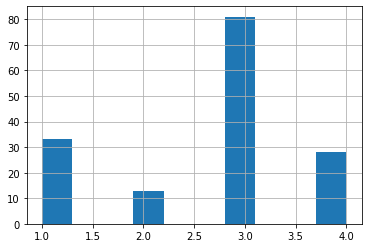

In [60]:
df[df['outcome'] == 1][column].hist()

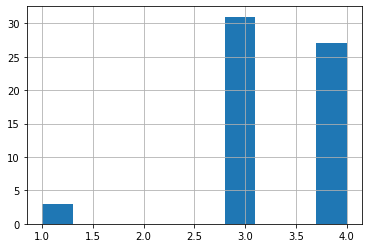

In [61]:
df[df['outcome'] == 2][column].hist()

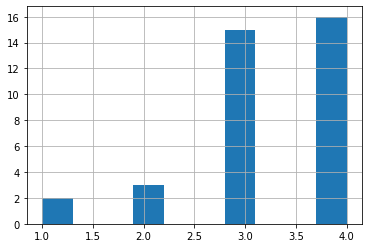

In [62]:
df[df['outcome'] == 3][column].hist()

In [63]:
# этот показатель слабо связан с исходом для лошади, а скорее просто является неотъемлемым атрибутом изучаемой болезни.
# Поскольку практического смысла он для нас не несет, можно им пожертвовать
df.drop(column, axis = 1, inplace = True)

In [64]:
df.sample()

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,
528904,2.0,3.0,3.0,3.0,2.0,5.0,4.0,60.0,NaN,2.0,1,41110


In [65]:
# изучим параметр abdominal distension
# - An IMPORTANT parameter.
# 1 = none
# 2 = slight
# 3 = moderate
# 4 = severe
# - an animal with abdominal distension is likely to be painful and have reduced gut motility.
# - a horse with severe abdominal distension is likely to require surgery just to relieve the pressure

column = 'abdominal distension'
print(column)
print(df.groupby('outcome')[column].agg(['mean','median', 'count', 'min', 'max' ]))
print('- '*30)
print(f'количество пропусков: {len(df[df[column].isnull() == True])}')

abdominal distension
             mean  median  count  min  max
outcome                                   
1.0      1.938776     2.0    147  1.0  4.0
2.0      2.754098     3.0     61  1.0  4.0
3.0      2.677419     3.0     31  1.0  4.0
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
количество пропусков: 27


In [66]:
for outcome in range(1,4):
    print(df[df['outcome'] == outcome][column].mode()[0])

1.0
3.0
3.0


In [67]:
# Для погибших и умерщвленных лошадей пропуски заменяем значением 3, а для выживших значением 2. 
# Для выживших это не совсем корректно, но картину особо не исказит
df.loc[(df['outcome'] == 1) & (df[column].isnull() == True),column] = 2
df.loc[(df['outcome'] >= 2) & (df[column].isnull() == True),column] = 3
df.sample(3)

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,
5291329,2.0,1.0,1.0,2.0,1.0,1.0,2.0,37.0,6.1,2.0,2,0
526802,1.0,1.0,1.0,1.0,1.0,3.0,3.0,37.0,7.0,1.0,1,3124
529849,1.0,1.0,3.0,2.0,2.0,2.0,3.0,40.0,4.5,1.0,1,5206


In [68]:
# Изучим параметр packed cell volume
# - linear
# - the # of red cells by volume in the blood
# - normal range is 30 to 50. The level rises as the circulation becomes compromised or
# as the animal becomes dehydrated.

column = 'packed cell volume'
print(column)
print(df.groupby('outcome')[column].agg(['mean','median', 'count', 'min', 'max' ]))
print('-  '*20)
print(f'количество пропусков: {len(df[df[column].isnull() == True])}')

packed cell volume
              mean  median  count   min   max
outcome                                      
1.0      42.882353    43.0    153  23.0  69.0
2.0      53.200000    54.0     65  33.0  75.0
3.0      51.545455    52.0     33  31.0  75.0
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
количество пропусков: 15


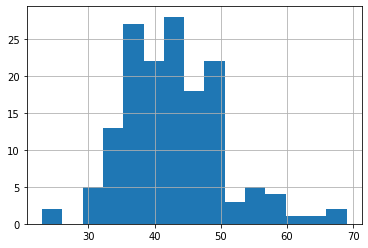

In [69]:
df[df['outcome'] == 1][column].hist(bins = 15)

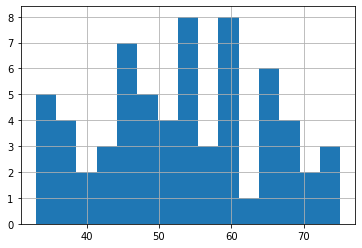

In [70]:
df[df['outcome'] == 2][column].hist(bins = 15)

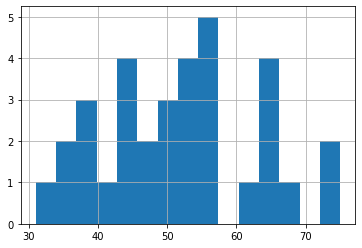

In [71]:
df[df['outcome'] == 3][column].hist(bins = 15)

In [72]:
# каких-то глобальных инсайтов данные по гематокриту не дают, поэтому просто заполним пропуски
# тут для всех групп очень близки среднее и медианное значения, поэтому медианой и заполним (она круглая)
df[column].fillna(df.groupby('outcome')[column].transform('median'), inplace = True)

In [73]:
df[column].isnull().value_counts()

False    267
Name: packed cell volume, dtype: int64

In [74]:
df.sample(3)

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,abdominal distension,packed cell volume,total protein,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,,
530526,1.0,4.0,3.0,3.0,2.0,3.0,3.0,43.0,7.0,1.0,1,3111
534857,2.0,1.0,1.0,2.0,1.0,2.0,1.0,44.0,68.0,1.0,2,0
534324,1.0,1.0,1.0,1.0,1.0,1.0,4.0,43.0,NaN,1.0,1,3111


In [75]:
# изучим параметр total protein, общий белок крови
# - linear
# - normal values lie in the 6-7.5 (gms/dL) range
# - the higher the value the greater the dehydration
column = 'total protein'
print(column)
print(df.groupby('outcome')[column].agg(['mean','median', 'count', 'min', 'max' ]))
print('-  '*20)
print(f'количество пропусков: {len(df[df[column].isnull() == True])}')

total protein
              mean  median  count  min   max
outcome                                     
1.0      27.690196     7.5    153  4.5  81.0
2.0       6.793443     6.8     61  3.3   9.0
3.0      42.103030    57.0     33  5.5  89.0
-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
количество пропусков: 19


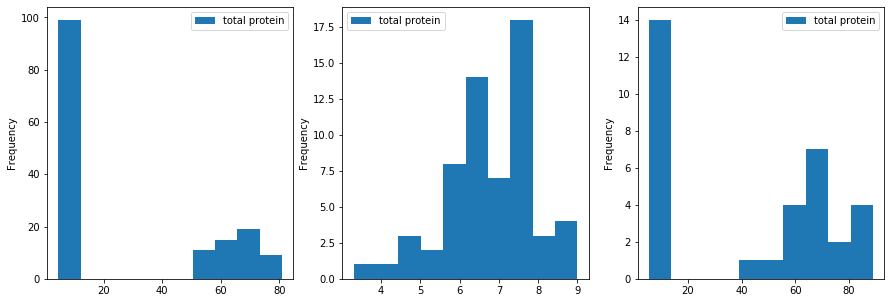

<Figure size 720x360 with 0 Axes>

In [108]:
fig, axs = plt.subplots(1,3)
plt.figure(figsize = (10,5))
df[df['outcome'] == 1][column].plot(kind = 'hist', legend = True, ax = axs[0], y = 'outcome = 1', figsize = (15,5))
df[df['outcome'] == 2][column].plot(kind = 'hist', legend = True, ax = axs[1])
df[df['outcome'] == 3][column].plot(kind = 'hist', legend = True, ax = axs[2])

In [109]:
# на мой непрофессиональный взгляд, в этих данных либо полно ошибок, либо они представлены в разных единицах измерения.
# В любом случае, они не дают возможности делать хоть какие-то выводы, поэтому удаляем их

In [ ]:
df.drop(column, axis =1, inplace = True)

In [113]:
df.sample(3)

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,abdominal distension,packed cell volume,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,
528523,1.0,1.0,1.0,5.0,2.0,3.0,2.0,50.0,1.0,1,2208
528890,1.0,3.0,3.0,3.0,1.0,2.0,3.0,54.0,2.0,1,7111
534324,1.0,1.0,1.0,1.0,1.0,1.0,4.0,43.0,1.0,1,3111


In [130]:
# Найдем строку, в которой не указан исход для лошади и удалим ее
df.loc[df['outcome'].isnull() == True]

,surgery?,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,pain,abdominal distension,packed cell volume,outcome,surgical lesion?,type of lesion
Hospital Number,,,,,,,,,,,
534572,NaN,3.0,1.0,3.0,1.0,4.0,1.0,43.0,NaN,1,3111


In [141]:
df.drop(534572, inplace = True)

In [144]:
df['surgical lesion?'].isnull().value_counts()

False    266
Name: surgical lesion?, dtype: int64

In [145]:
df['type of lesion'].isnull().value_counts()

False    266
Name: type of lesion, dtype: int64

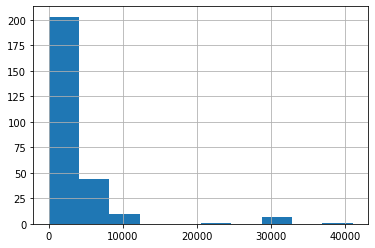

In [147]:
# Последний столбец с подробностями заболевания, наверное, самый интересный, но требует совсем уж специальных знаний
# Его удалять не рискну, в виду важности, но и анализировать не возьмусь